In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np

In [2]:
old_dir = 'vegetable_images/'
new_dir_train = 'vegetable_images_tf/'
new_dir_test = 'vegetable_images_tf_test/'

In [ ]:
for folder in os.listdir('vegetable_images/'):
    if folder == ".DS_Store":
        continue
    for class_name in os.listdir(old_dir + folder):
        if class_name == ".DS_Store":
            continue
        for file in os.listdir(os.path.join(old_dir, folder, class_name)):
            src = os.path.join(old_dir, folder, class_name, file)
            if folder == 'test':
                tgt = os.path.join(new_dir_test, class_name, file)
                if not os.path.exists(os.path.join(new_dir_test, class_name)):
                    os.makedirs(os.path.join(new_dir_test, class_name))
            else:
                tgt = os.path.join(new_dir_train, class_name, file)
                if not os.path.exists(os.path.join(new_dir_train, class_name)):
                    os.makedirs(os.path.join(new_dir_train, class_name))
            #print(src)
            #print(tgt)
           
            shutil.copy2(src, tgt)

In [3]:
img_height = 224
img_width = 224
batch_size = 32

In [4]:
classes = os.listdir(new_dir_train)
classes = [c for c in classes if c != ".DS_Store"]
classes

['Capsicum',
 'Radish',
 'Pumpkin',
 'Cauliflower',
 'Potato',
 'Bean',
 'Cucumber',
 'Brinjal',
 'Cabbage',
 'Broccoli',
 'Bitter_Gourd',
 'Papaya',
 'Bottle_Gourd',
 'Tomato',
 'Carrot']

In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.5, 1.5),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create a Keras DataGenerator with data augmentation
train_ds = datagen.flow_from_directory(
    new_dir_train,
    subset="training",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=classes
)

val_ds = datagen.flow_from_directory(
    new_dir_train,
    subset="validation",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=classes
)

Found 31200 images belonging to 15 classes.
Found 7800 images belonging to 15 classes.


In [6]:
test_datagen = ImageDataGenerator(
)

test_ds = datagen.flow_from_directory(
    new_dir_test, 
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    classes=classes

)

Found 3000 images belonging to 15 classes.


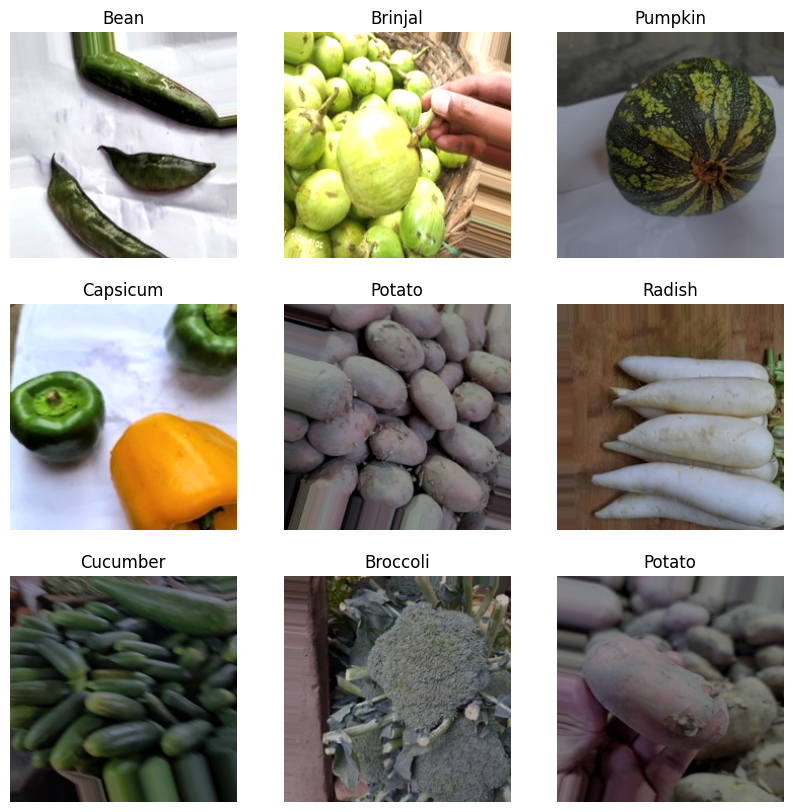

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(classes[int(labels[i])])
        plt.axis("off")
    break

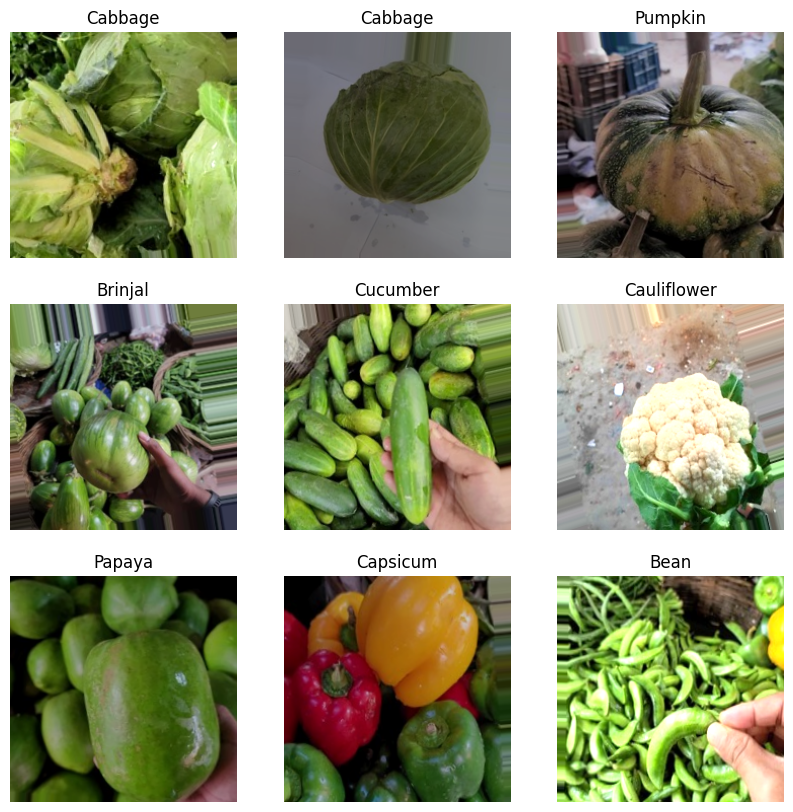

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(classes[int(labels[i])])
        plt.axis("off")
    break

In [9]:
resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling='avg'
)
out = tf.keras.layers.Dense(len(classes))(resnet.output)
model = tf.keras.models.Model(inputs=resnet.input, outputs=out)

model.summary()

2023-10-15 02:55:40.374471: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-10-15 02:55:40.374499: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-10-15 02:55:40.374508: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-10-15 02:55:40.374709: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-15 02:55:40.375071: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, None, None, 64)       16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, None, None, 64)       256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, None, None, 64)       0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, None, None, 512)      66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, None, None, 512)      2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, None, None, 512)      0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, None, None, 256)      590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, None, None, 1024)     525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, None, None, 1024)     0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, None, None, 256)      262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, None, None, 1024)     4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, None, None, 1024)     0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, None, None, 1024)     0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, None, None, 512)      2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, None, None, 512)      2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

EPOCHS = 10
checkpoint_filepath = 'models/resnet50'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=[model_checkpoint_callback])

Epoch 1/10


2023-10-15 02:55:43.556039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


975/975 [==============================] - ETA: 0s - loss: 0.2831 - accuracy: 0.9208INFO:tensorflow:Assets written to: models/resnet50/assets


INFO:tensorflow:Assets written to: models/resnet50/assets


975/975 [==============================] - 495s 503ms/step - loss: 0.2831 - accuracy: 0.9208 - val_loss: 1.6029 - val_accuracy: 0.6640
Epoch 2/10
975/975 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9706INFO:tensorflow:Assets written to: models/resnet50/assets


INFO:tensorflow:Assets written to: models/resnet50/assets


975/975 [==============================] - 491s 503ms/step - loss: 0.0987 - accuracy: 0.9706 - val_loss: 0.3996 - val_accuracy: 0.8937
Epoch 3/10
975/975 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9784INFO:tensorflow:Assets written to: models/resnet50/assets


INFO:tensorflow:Assets written to: models/resnet50/assets


975/975 [==============================] - 491s 503ms/step - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.2876 - val_accuracy: 0.9060
Epoch 4/10
975/975 [==============================] - 5539s 6s/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.6329 - val_accuracy: 0.8205
Epoch 5/10
975/975 [==============================] - 4995s 5s/step - loss: 0.0694 - accuracy: 0.9794 - val_loss: 1.6206 - val_accuracy: 0.6826
Epoch 6/10
975/975 [==============================] - 3765s 4s/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 31.4542 - val_accuracy: 0.4013
Epoch 7/10
975/975 [==============================] - 3488s 4s/step - loss: 0.0579 - accuracy: 0.9837 - val_loss: 0.7267 - val_accuracy: 0.8338
Epoch 8/10
975/975 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9894INFO:tensorflow:Assets written to: models/resnet50/assets


INFO:tensorflow:Assets written to: models/resnet50/assets


975/975 [==============================] - 5575s 6s/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.1106 - val_accuracy: 0.9705
Epoch 9/10
975/975 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9902INFO:tensorflow:Assets written to: models/resnet50/assets


INFO:tensorflow:Assets written to: models/resnet50/assets


975/975 [==============================] - 1893s 2s/step - loss: 0.0330 - accuracy: 0.9902 - val_loss: 0.0601 - val_accuracy: 0.9803
Epoch 10/10
975/975 [==============================] - 1921s 2s/step - loss: 0.0286 - accuracy: 0.9916 - val_loss: 4.8421 - val_accuracy: 0.5783


In [11]:
new_model = tf.keras.models.load_model('models/resnet50/')

In [12]:
new_model.evaluate(train_ds)

975/975 [==============================] - 185s 189ms/step - loss: 0.0496 - accuracy: 0.9836


[0.04962296783924103, 0.9835577011108398]

In [13]:
new_model.evaluate(val_ds)

244/244 [==============================] - 46s 187ms/step - loss: 0.0584 - accuracy: 0.9813


[0.058368995785713196, 0.9812820553779602]

In [14]:
new_model.evaluate(test_ds)

94/94 [==============================] - 18s 187ms/step - loss: 0.0568 - accuracy: 0.9793


[0.05682320147752762, 0.9793333411216736]